<a href="https://colab.research.google.com/github/gabrielluiz97/FertilityDataSet/blob/master/Fertility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
99/99 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.7172
Epoch 2/100
99/99 [==============================] - 0s 1ms/step - loss: 0.5339 - accuracy: 0.8788
Epoch 3/100
99/99 [==============================] - 0s 994us/step - loss: 0.3985 - accuracy: 0.8788
Epoch 4/100
99/99 [==============================] - 0s 1ms/step - loss: 0.3602 - accuracy: 0.8788
Epoch 5/100
99/99 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.8788
Epoch 6/100
99/99 [==============================] - 0s 1ms/step - loss: 0.3527 - accuracy: 0.8788
Epoch 7/100
99/99 [==============================] - 0s 1ms/step - loss: 0.3432 - accuracy: 0.8788
Epoch 8/100
99/99 [==============================] - 0s 1ms/step - loss: 0.3405 - accuracy: 0.8788
Epoch 9/100
99/99 [==============================] - 0s 1ms/step - loss: 0.3367 - accuracy: 0.8788
Epoch 10/100
99/99 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.8788
Epoch 1

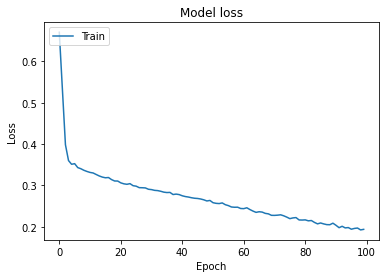

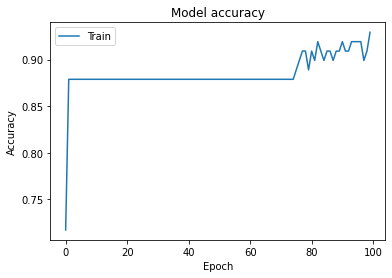

In [7]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import SVG
from keras.utils import model_to_dot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def main():
      fertilityDiagnosisCSV = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00244/fertility_Diagnosis.txt", sep=',')
      datasetFertility = fertilityDiagnosisCSV.values
      
      for j in range(len(datasetFertility)):
          if datasetFertility[j][9] == "N":
            datasetFertility[j][9] = 1 
          elif datasetFertility[j][9] == "O":
            datasetFertility[j][9] = 0 
      #define o range de coluna dos atributos de entrada
      X = datasetFertility[:,0:9]
      #define a coluna de saída
      y = datasetFertility[:,9]


      model = Sequential()
      #perceptron possui 3 camadas(1-entrada, 2-camda oculta, 3- saída)      
      #no primeiro parâmetro é definida a quantidade de neurônios da camada
      #no segundo parâmetro Activation= define a função de ativação que será utilizada que no caso foi a 'Relu' e 'sigmoid'
      #A camada de saída por fim possui apenas 1 neurônio
      model.add(Dense(12, activation='relu', input_shape=(9,)))
      model.add(Dense(8, activation='relu'))
      model.add(Dense(1, activation='sigmoid'))


      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
      scaler  = StandardScaler().fit(X_train)
      X_train = scaler.transform(X_train)
      X_test  = scaler.transform(X_test)
      #A compilação do modelo escolhe o melhor caminho para representar a rede e fazer as predições
      # 'binary_crossentropy' representa uma função de perda logarítimica 
      #Adam é um algorítimo gradiente de descida 
      model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

      #fit é a função de treinamento da perceptron
      #onde é definido o número de vezes que a perceptron irá treinar com os 
      history = model.fit(X, y ,epochs=100, batch_size=1, verbose=1)

      y_pred = model.predict(X_test)
      print(y_pred)

      plt.plot(history.history['loss'])
      plt.title('Model loss')
      plt.ylabel('Loss')
      plt.xlabel('Epoch')
      plt.legend(['Train', 'Test'], loc='upper left')
      plt.show()

      plt.plot(history.history['accuracy'])
      plt.title('Model accuracy')
      plt.ylabel('Accuracy')
      plt.xlabel('Epoch')
      plt.legend(['Train', 'Test'], loc='upper left')
      plt.show()
if __name__== "__main__":
  main()


In [0]:
!pip install git+https://github.com/tensorflow/docs


In [0]:
!pip uninstall tensorflow==2.0
!pip install tensorflow==1.14